In [2]:
#specialized visualization tools

In [3]:
# Reading the data set 
# importing libraries 
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl

#readin the data 
df = pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2, engine='openpyxl')
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
# performing some preprocessing stuff to the dataset
print(df.shape)

(195, 43)


In [5]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)


# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))
# or we have another code to do the same 

# df.columns = df.columns.astype(str)

# This code will convert all the column labels to strings, ensuring consistency in their data type.




# set the country name as index - useful for quickly looking up countries using .loc method
df.set_index('Country', inplace=True)

# add total column
df['Total'] = df.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df.shape)
years

data dimensions: (195, 38)


C:\Users\PC\AppData\Local\Temp\ipykernel_18592\1916161078.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total'] = df.sum(axis=1)


['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [6]:
# visualization part 
# 1. Piechart
# A pie chart is a circular graphic that displays numeric proportions by dividing a circle (or pie) 
# into proportional slices. You are most likely already familiar with pie charts as it is 
# widely used in business and media. We can create pie charts in Matplotlib by passing in the kind=pie keyword.

In [7]:
# Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the 
# entire time period from 1980 to 2013.



# grouping countries by continents and apply sum() function 
df_continents = df.groupby('Continent', axis=0).sum()

print(type(df.groupby('Continent', axis=0)))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [8]:
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


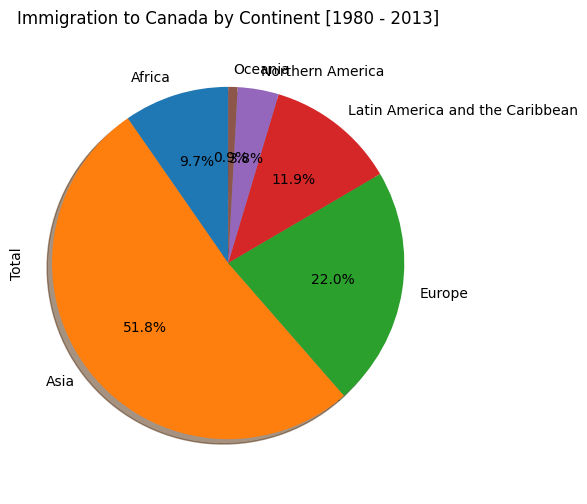

In [9]:
# Step 2: Plot the data. We will pass in kind = 'pie' keyword, along with the following additional parameters:

# autopct - is a string or function used to label the wedges with their numeric value. The label will be 
# placed inside the wedge. If it is a format string, the label will be fmt%pct.
# startangle - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
# shadow - Draws a shadow beneath the pie (to give a 3D feel).



# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()


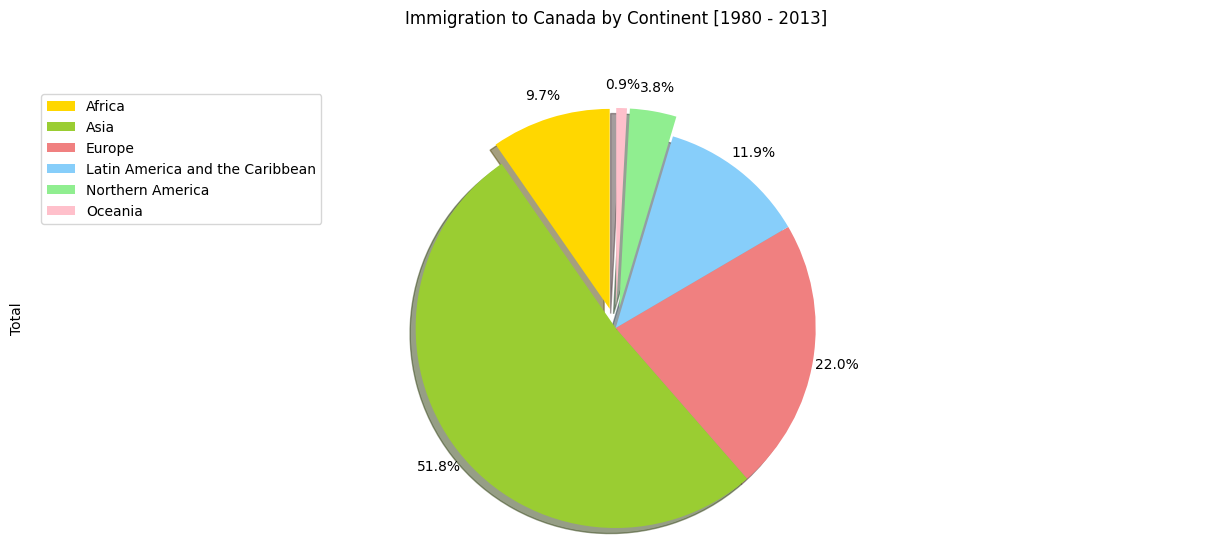

In [10]:
# The above visual is not very clear, the numbers and text overlap in some instances. Let's 
# make a few modifications to improve the visuals:

# Remove the text labels on the pie chart by passing in legend and add it as a seperate legend using plt.legend().
# Push out the percentages to sit just outside the pie chart by passing in pctdistance parameter.
# Pass in a custom set of colors for continents by passing in colors parameter.
# Explode the pie chart to emphasize the lowest three continents (Africa, North America, and 
# Latin America and Caribbean) by passing in explode parameter.

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()



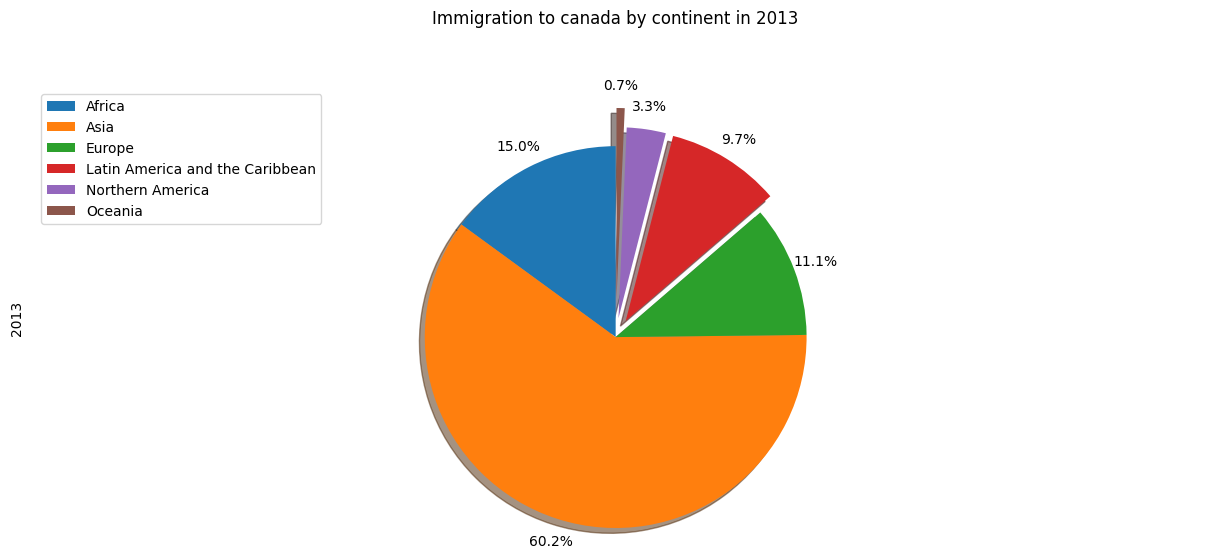

In [11]:
# Question: Using a pie chart, explore the proportion (percentage) of new immigrants grouped 
# by continents in the year 2013.

# Note: You might need to play with the explore values in order to fix any overlapping slice values.

explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2]
df_continents['2013'].plot(kind='pie',
                           figsize=(15, 6),
                           autopct = '%1.1f%%',
                           startangle = 90, 
                           shadow = True, 
                           labels = None,
                           pctdistance = 1.12, 
                           explode = explode_list
                           )


plt.title('Immigration to canada by continent in 2013', y=1.12)
plt.axis('equal')

# adding legend
plt.legend(labels = df_continents.index, loc = 'upper left')

# showing plot 
plt.show()

In [12]:
# A box plot is a way of statistically representing the distribution of the data through five main dimensions:

# Minimum: The smallest number in the dataset excluding the outliers.
# First quartile: Middle number between the minimum and the median.
# Second quartile (Median): Middle number of the (sorted) dataset.
# Third quartile: Middle number between median and maximum.
# Maximum: The largest number in the dataset excluding the outliers

In [13]:
# method to plot boxplot 
# To make a boxplot, we can use kind=box in plot method invoked on a pandas series or dataframe.

##  plot the box plot for the Japanese immigrants between 1980 - 2013.
# Step 1: Get the subset of the dataset. Even though we are extracting the data for just one country, 
# we will obtain it as a dataframe. This will help us with calling the dataframe.describe() method to 
# view the percentiles.

In [15]:
#To get a dataframe, place extra square bracket around 'Japan' 
df_japan = df.loc[['Japan'], years].transpose()
df_japan

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246
1985,198
1986,248
1987,422
1988,324
1989,494


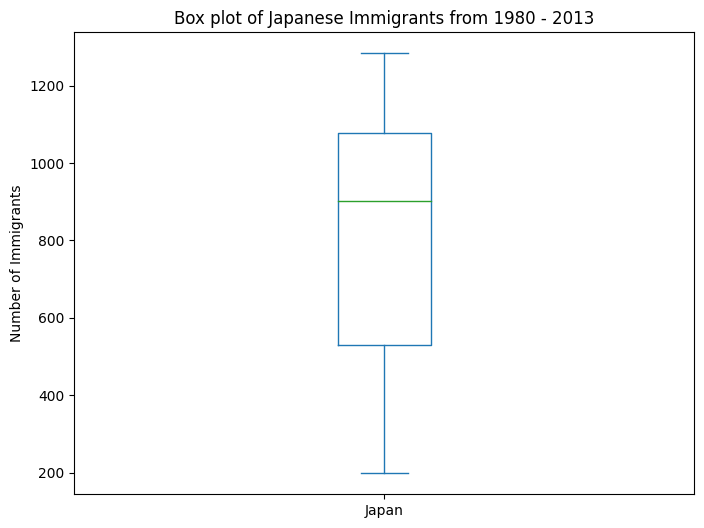

In [16]:
# step 2: Plot by passing in kind = 'box'
df_japan.plot(kind='box', figsize=(8,6))
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.show()

In [17]:
# We can immediately make a few key observations from the plot above:

# The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and median 
# number of immigrants is around 900 (median).
# 25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).
# 75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).

In [18]:
# statistical description
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [19]:

# Question: Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013
df_CI = df.loc[['China', 'India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


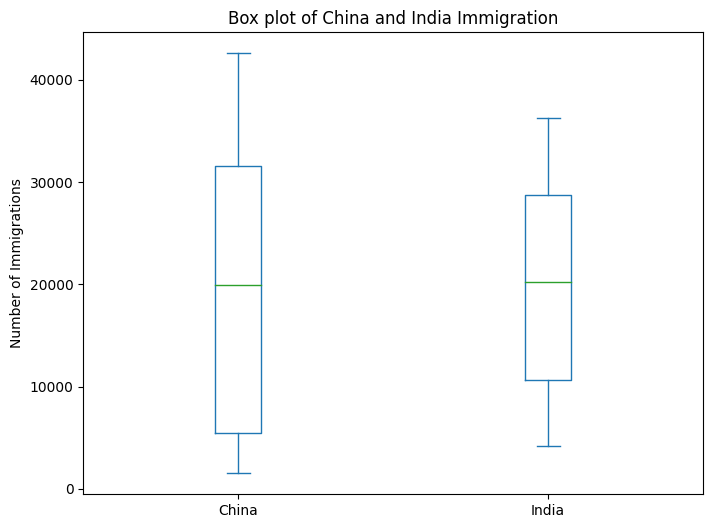

In [20]:
# Plotting by passing in kind='box'
df_CI.plot(kind='box', figsize = (8,6))
plt.title('Box plot of China and India Immigration')
plt.ylabel('Number of Immigrations')
plt.show()

In [21]:
# Let's view the percentiles associated with both countries using the describe() method.
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


In [ ]:
# We can observe that, while both countries have around the same median immigrant population (~20,000), 
# China's immigrant population range is more spread out than India's. The maximum population from India 
# for any year (36,210) is around 15% lower than the maximum population from China (42,584).

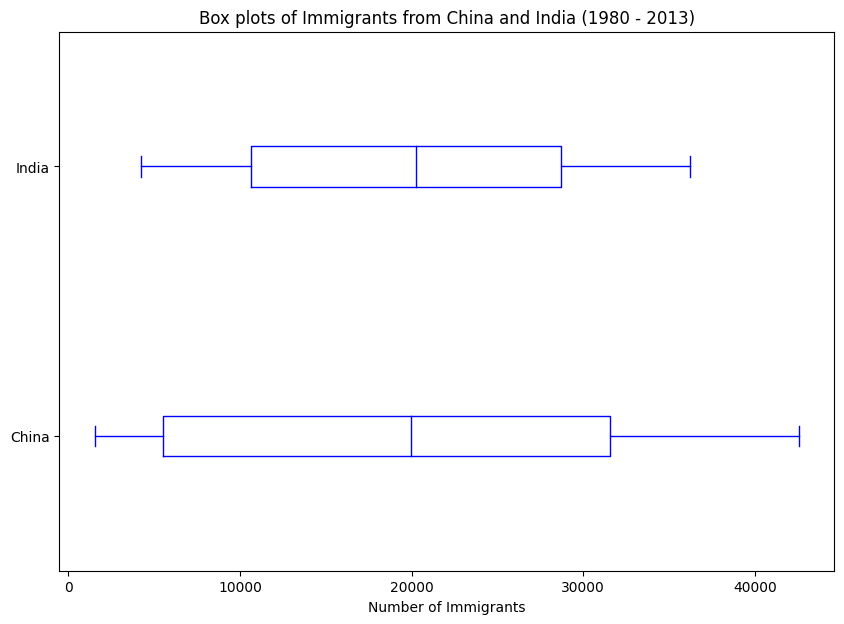

In [22]:
# creating the horizontal parameter 
# If you prefer to create horizontal box plots, you can pass the vert parameter in the plot function 
# and assign it to False. You can also specify a different color in case you are not a big fan of the default red color.


#horizontal box plots
df_CI.plot(kind='box', figsize=(10,7), color = 'blue', vert = False)
plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

In [ ]:
# # Subplots
# Often times we might want to plot multiple plots within the same figure. For example, we might want to 
# perform a side by side comparison of the box plot with the line plot of China and India's immigration.

# To visualize multiple plots together, we can create a figure (overall canvas) and divide it into subplots, 
# each containing a plot. With subplots, we usually work with the artist layer instead of the scripting layer.

In [ ]:

# Typical syntax is :

#     fig = plt.figure() # create figure
#     ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
# Where

# nrows and ncols are used to notionally split the figure into (nrows * ncols) sub-axes,
# plot_number is used to identify the particular subplot that this function is to create 
# within the notional grid. 
# plot_number starts at 1, increments across rows first and has a maximum of nrows * ncols as shown below.


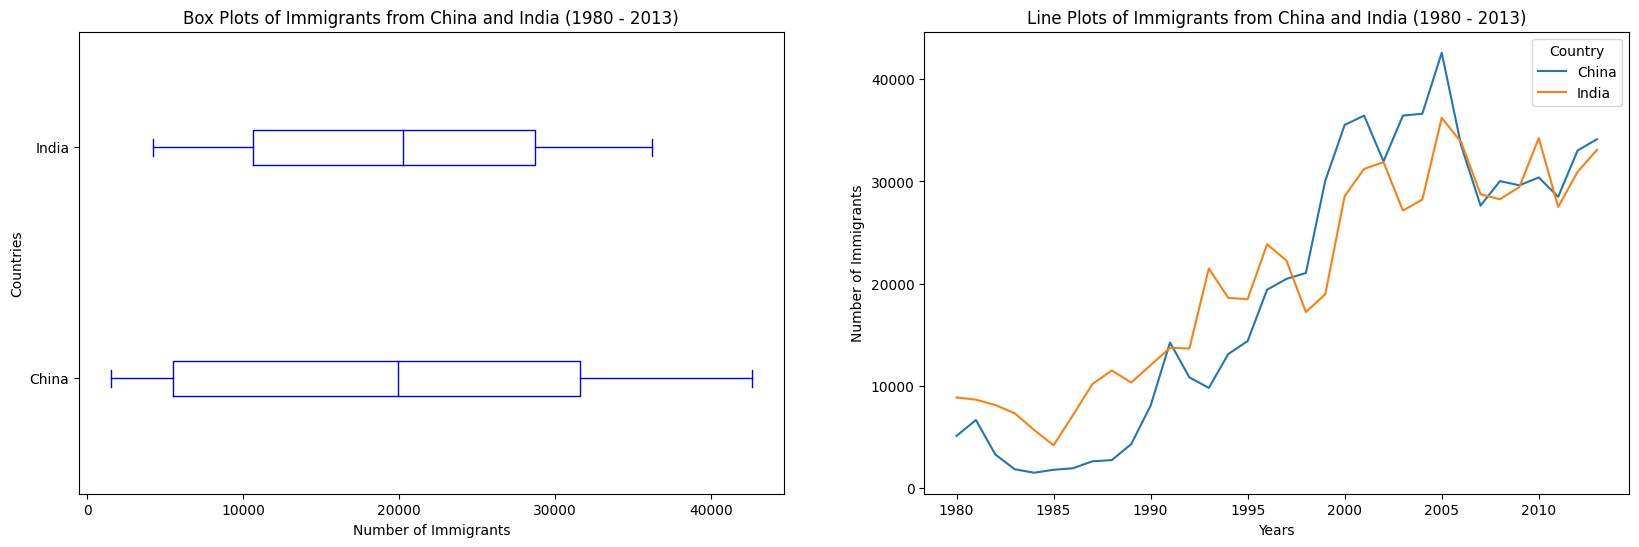

In [23]:
fig = plt.figure()              # create figure

ax0 = fig.add_subplot(1, 2, 1)  # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2)  # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

In [ ]:
# Question: Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) 
# grouped by the decades 1980s, 1990s, and 2000s

In [24]:
# Step 1: Obtaining the top 15 countries based on Total immigrant population. Name the dataframe df_top15.

df_top15 = df.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [25]:
# Step 2: Creating a new dataframe which contains the aggregate for each decade. One way to do that:

# Create a list of all years in decades 80's, 90's, and 00's.
# Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
# Merge the three series into a new data frame. Call your dataframe new_df.

# create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

# slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

# display dataframe
new_df.head()






,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [26]:
# getting the statistical description 
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000
